# Week 11 - Introduction to Modeling, part 2

# 1. Lesson - No lesson this week

# 2. Weekly graph question

In [20]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import seaborn as sns
import matplotlib.pyplot as plt

The book names one of Vonnegut's rules as "keep it simple" and another as "have the guts to cut."  Here is some data from the previous week's lesson.  If you had to cut one of the two plots below, which would it be?  Which seems more interesting or important?  Explain.  (Should "amount of training data used" or "number of estimators" be on the x-axis.)

In [2]:
np.random.seed(0)
num_points = 10000
feature_1a = np.random.random(size = num_points) * 3
feature_2a = np.random.random(size = num_points) * 3
feature_3a = np.random.random(size = num_points) * 3
train_target = (feature_1a - 2 * feature_2a) * feature_3a + np.random.normal(size = num_points)
feature_1b = np.random.random(size = num_points) * 3
feature_2b = np.random.random(size = num_points) * 3
feature_3b = np.random.random(size = num_points) * 3
test_target = (feature_1b - 2 * feature_2b) * feature_3b + np.random.normal(size = num_points)
train_df = pd.DataFrame({"f1": feature_1a, "f2": feature_2a, "f3": feature_3a})
test_df = pd.DataFrame({"f1": feature_1b, "f2": feature_2b, "f3": feature_3b})
rf = RandomForestRegressor()
rf.fit(train_df.values, train_target)

RandomForestRegressor()

In [3]:
rmse_lst = list()
rf = RandomForestRegressor()
for x in range(round(num_points / 20), num_points, round(num_points / 20)):
    rf.fit(train_df.values[0:x,:], train_target[0:x])
    rmse_lst.append(root_mean_squared_error(rf.predict(test_df.values), test_target))

import matplotlib.pyplot as plt

Text(0, 0.5, 'Loss function')

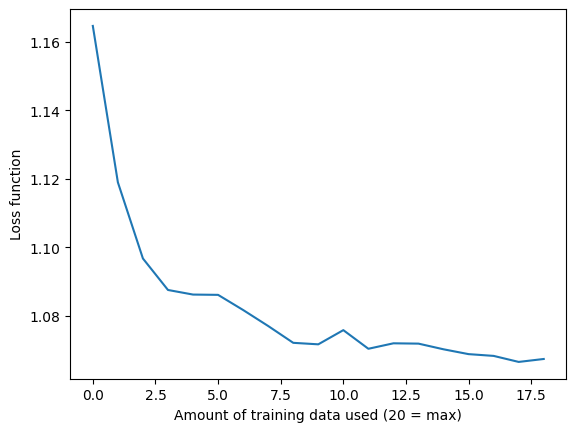

In [4]:
plt.plot(rmse_lst)
plt.xlabel("Amount of training data used (20 = max)")
plt.ylabel("Loss function")

In [5]:
num_trees_lst = list()
for n_estimators in range(1, 100, 3):
    rf = RandomForestRegressor(n_estimators = n_estimators)
    rf.fit(train_df.values, train_target)
    num_trees_lst.append(root_mean_squared_error(rf.predict(test_df.values), test_target))

Text(0, 0.5, 'Loss function')

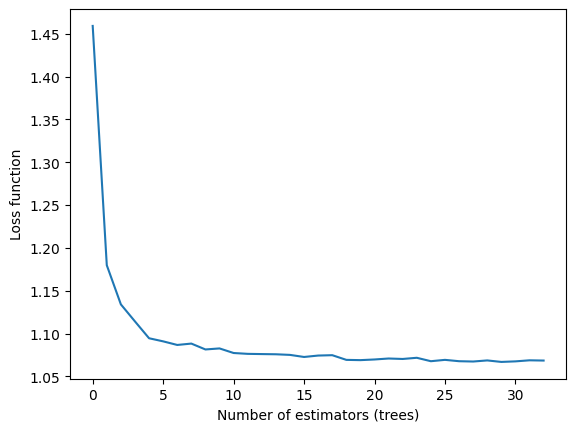

In [6]:
plt.plot(num_trees_lst)
plt.xlabel("Number of estimators (trees)")
plt.ylabel("Loss function")

## Weekly Graph Question

- **Which Plot to Cut**: I’d cut the plot with "amount of training data used" on the x-axis.
  - **Reason**: The "number of estimators" plot is more important. It shows how the Random Forest model’s performance changes with the number of trees, a key hyperparameter, revealing insights on overfitting and tuning. The training data plot just confirms that more data improves performance, which is less novel and actionable.
  - **Simplicity**: The estimators plot focuses on model optimization, aligning with "keep it simple." Training data size is less relevant due to external constraints like data availability.
- **X-Axis Choice**: "Number of estimators" is better for the x-axis.
  - **Reason**: It’s a controllable parameter, making it intuitive for tuning and interpretation. Training data size depends on external factors, less ideal for model-focused analysis.

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:

* Implement a random forest model.
* Perform cross-validation.
* Tune hyperparameters.
* Evaluate a performance metric.

If you like, you can try other types of models, too (beyond linear regression and random forest) although you will have many opportunities to do that next semester.

In [7]:
import os
import kagglehub
from kagglehub import KaggleDatasetAdapter
import matplotlib.ticker as mtick
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import GridSearchCV, cross_val_score

print(os.listdir())
print(os.getcwd()) 

path = kagglehub.dataset_download("abcbbong/bu-699-o2")

print("Path to dataset files:", path)



df_fraud_train = pd.read_csv(os.path.join(path, 'fraud_train_processed.csv'))
df_fraud_test = pd.read_csv(os.path.join(path, 'fraud_test_processed.csv'))          
df_credit_approval = pd.read_csv(os.path.join(path, 'credit_approval_processed.csv'))
df_loan_default = pd.read_csv(os.path.join(path, 'loan_default_processed.csv'))

C:\Users\abcbb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


['.git', '.gitignore', '.venv', 'histogram.png', 'OMDS-MODB2-Week1-Lee-JaeHoon.ipynb', 'OMDS-MODB2-Week10-Lee-JaeHoon.ipynb', 'OMDS-MODB2-Week11-Lee-JaeHoon.ipynb', 'OMDS-MODB2-Week2-Lee-JaeHoon.ipynb', 'OMDS-MODB2-Week3-Lee-JaeHoon.ipynb', 'OMDS-MODB2-Week4-Lee-JaeHoon.ipynb', 'OMDS-MODB2-Week5-Lee-JaeHoon.ipynb', 'OMDS-MODB2-Week6-Lee-JaeHoon.ipynb', 'OMDS-MODB2-Week7-Lee-JaeHoon.ipynb', 'OMDS-MODB2-Week8-Lee-JaeHoon.ipynb', 'OMDS-MODB2-Week9-Lee-JaeHoon.ipynb', 'README.md', 'threeclouds.png', 'twoclouds.png', 'Week12.ipynb', 'Week13.ipynb', 'Week14.ipynb']
e:\BU\CDSDX 699 O2\Homework
Path to dataset files: C:\Users\abcbb\.cache\kagglehub\datasets\abcbbong\bu-699-o2\versions\3


In [8]:
df_fraud_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 35 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   trans_date_trans_time    1296675 non-null  object 
 1   cc_num                   1296675 non-null  int64  
 2   merchant                 1296675 non-null  object 
 3   category                 1296675 non-null  object 
 4   amt                      1296675 non-null  float64
 5   first                    1296675 non-null  object 
 6   last                     1296675 non-null  object 
 7   gender                   1296675 non-null  object 
 8   street                   1296675 non-null  object 
 9   city                     1296675 non-null  object 
 10  state                    1296675 non-null  object 
 11  zip                      1296675 non-null  int64  
 12  lat                      1296675 non-null  float64
 13  long                     1296675 non-null 

In [9]:
df_fraud_train.nunique()

trans_date_trans_time      1274791
cc_num                         983
merchant                       693
category                        14
amt                          52928
first                          352
last                           481
gender                           2
street                         983
city                           894
state                           51
zip                            970
lat                            968
long                           969
city_pop                       879
job                            494
dob                            968
trans_num                  1296675
merch_lat                  1247805
merch_long                 1275745
is_fraud                         2
category_entertainment           2
category_food_dining             2
category_gas_transport           2
category_grocery_net             2
category_grocery_pos             2
category_health_fitness          2
category_home                    2
category_kids_pets  

In [10]:
# Extract hour from trans_date_trans_time before dropping
df_fraud_train['trans_date_trans_time'] = pd.to_datetime(df_fraud_train['trans_date_trans_time'])
df_fraud_train['hour'] = df_fraud_train['trans_date_trans_time'].dt.hour

# Drop unnecessary columns (keep hour for now)
drop_cols = ['trans_date_trans_time', 'cc_num', 'merchant', 'first', 'last', 'street', 'city', 'job', 'dob', 'trans_num', 'category', 'zip', 'state']
df_cfd_train_preprocessed = df_fraud_train.drop(columns=drop_cols)

# One-hot encode gender
df_cfd_train_preprocessed = pd.get_dummies(df_cfd_train_preprocessed, columns=['gender'], drop_first=True)

# Cyclical encoding for hour (sin/cos to capture cyclical nature)
df_cfd_train_preprocessed['hour_sin'] = np.sin(2 * np.pi * df_cfd_train_preprocessed['hour'] / 24)
df_cfd_train_preprocessed['hour_cos'] = np.cos(2 * np.pi * df_cfd_train_preprocessed['hour'] / 24)

# Drop original hour
df_cfd_train_preprocessed = df_cfd_train_preprocessed.drop(columns=['hour'])

# Separate features and target
X_cfd_train = df_cfd_train_preprocessed.drop('is_fraud', axis=1)
y_cfd_train = df_fraud_train['is_fraud']

# Print shapes to confirm (now with 2 extra columns: hour_sin, hour_cos)
print("X shape:", X_cfd_train.shape)
print("y shape:", y_cfd_train.shape)

X shape: (1296675, 23)
y shape: (1296675,)


In [11]:
# Extract hour from trans_date_trans_time before dropping
df_fraud_test['trans_date_trans_time'] = pd.to_datetime(df_fraud_test['trans_date_trans_time'])
df_fraud_test['hour'] = df_fraud_test['trans_date_trans_time'].dt.hour

# Drop unnecessary columns (keep hour for now)
drop_cols = ['trans_date_trans_time', 'cc_num', 'merchant', 'first', 'last', 'street', 'city', 'job', 'dob', 'trans_num', 'category', 'zip', 'state']
df_cfd_test_preprocessed = df_fraud_test.drop(columns=drop_cols)

# One-hot encode gender
df_cfd_test_preprocessed = pd.get_dummies(df_cfd_test_preprocessed, columns=['gender'], drop_first=True)

# Cyclical encoding for hour (sin/cos to capture cyclical nature)
df_cfd_test_preprocessed['hour_sin'] = np.sin(2 * np.pi * df_cfd_test_preprocessed['hour'] / 24)
df_cfd_test_preprocessed['hour_cos'] = np.cos(2 * np.pi * df_cfd_test_preprocessed['hour'] / 24)

# Drop original hour
df_cfd_test_preprocessed = df_cfd_test_preprocessed.drop(columns=['hour'])

# Separate features and target
X_cfd_test = df_cfd_test_preprocessed.drop('is_fraud', axis=1)
y_cfd_test = df_fraud_test['is_fraud']

# Print shapes to confirm (now with 2 extra columns: hour_sin, hour_cos)
print("X shape:", X_cfd_test.shape) 
print("y shape:", y_cfd_test.shape)

X shape: (555719, 23)
y shape: (555719,)


In [12]:
# Train Random Forest model with n_jobs=-1 and class_weight='balanced'
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1)
rf.fit(X_cfd_train, y_cfd_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

In [13]:
# Predict and evaluate on test set
y_pred = rf.predict(X_cfd_test)
print("Classification Report for Default Model:\n", classification_report(y_cfd_test, y_pred))

Classification Report for Default Model:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.88      0.67      0.76      2145

    accuracy                           1.00    555719
   macro avg       0.94      0.84      0.88    555719
weighted avg       1.00      1.00      1.00    555719



In [14]:
# Perform 5-fold Cross-Validation (using 10% sample to save time)
np.random.seed(42)
sample_idx = np.random.choice(X_cfd_train.index, size=int(0.1 * len(X_cfd_train)), replace=False)
X_cfd_train_sample = X_cfd_train.loc[sample_idx]
y_cfd_train_sample = y_cfd_train.loc[sample_idx]

cv_scores = cross_val_score(rf, X_cfd_train_sample, y_cfd_train_sample, cv=5, scoring='f1_macro')
print("5-Fold CV F1-Macro Scores (on 10% sample):", cv_scores)
print("Mean CV F1-Macro Score:", cv_scores.mean())

5-Fold CV F1-Macro Scores (on 10% sample): [0.87672868 0.85932194 0.87191931 0.87288371 0.87239589]
Mean CV F1-Macro Score: 0.8706499062201942


In [15]:
# Hyperparameter tuning with GridSearchCV (on sampled data, with n_jobs=-1)
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [5, 10, None]
}
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1),
    param_grid,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1  # Parallelize GridSearchCV
)
grid_search.fit(X_cfd_train_sample, y_cfd_train_sample)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best CV F1-Macro Score:", grid_search.best_score_)

# Evaluate tuned model on full test set
best_rf = grid_search.best_estimator_
# Retrain on full training data with best parameters
best_rf.fit(X_cfd_train, y_cfd_train)
y_pred_tuned = best_rf.predict(X_cfd_test)
print("Tuned Model Classification Report:\n", classification_report(y_cfd_test, y_pred_tuned))

Best Parameters: {'max_depth': None, 'n_estimators': 100}
Best CV F1-Macro Score: 0.8706499062201942
Tuned Model Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.88      0.67      0.76      2145

    accuracy                           1.00    555719
   macro avg       0.94      0.84      0.88    555719
weighted avg       1.00      1.00      1.00    555719



In [16]:
df_credit_approval.info()
df_credit_approval.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25128 entries, 0 to 25127
Data columns (total 46 columns):
 #   Column                                                          Non-Null Count  Dtype 
---  ------                                                          --------------  ----- 
 0   Applicant_ID                                                    25128 non-null  int64 
 1   Applicant_Gender                                                25128 non-null  object
 2   Owned_Car                                                       25128 non-null  int64 
 3   Owned_Realty                                                    25128 non-null  int64 
 4   Total_Children                                                  25128 non-null  int64 
 5   Total_Income                                                    25128 non-null  int64 
 6   Income_Type                                                     25128 non-null  object
 7   Education_Type                                            

Applicant_ID                                                      25128
Applicant_Gender                                                      2
Owned_Car                                                             2
Owned_Realty                                                          2
Total_Children                                                        6
Total_Income                                                        195
Income_Type                                                           5
Education_Type                                                        5
Family_Status                                                         5
Housing_Type                                                          6
Owned_Mobile_Phone                                                    1
Owned_Work_Phone                                                      2
Owned_Phone                                                           2
Owned_Email                                                     

In [17]:
from sklearn.compose import ColumnTransformer

# Drop ID
df_ca = df_credit_approval.drop(columns=['Applicant_ID'])

# Separate features and target
y_ca = df_ca['Status']
X_ca = df_ca.drop('Status', axis=1)

# Split 80:20 with stratify
X_train_ca, X_test_ca, y_train_ca, y_test_ca = train_test_split(
    X_ca, y_ca, test_size=0.2, random_state=42, stratify=y_ca
)

# Identify columns (object for one-hot, number for scale)
cat_cols = X_train_ca.select_dtypes(include=['object']).columns.tolist()
num_cols = X_train_ca.select_dtypes(include=['number']).columns.tolist()

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols)
    ]
)

# Apply preprocessing
X_train_ca_pre = preprocessor.fit_transform(X_train_ca)
X_test_ca_pre = preprocessor.transform(X_test_ca)

print("Train shape:", X_train_ca_pre.shape)  # e.g., (20102, ~50 after one-hot)
print("Test shape:", X_test_ca_pre.shape)   # e.g., (5026, ~50)

# Random Forest
rf_ca = RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1)
rf_ca.fit(X_train_ca_pre, y_train_ca)

# Predict and evaluate
y_pred_ca = rf_ca.predict(X_test_ca_pre)
print("Default Model Classification Report:\n", classification_report(y_test_ca, y_pred_ca))

# 5-Fold CV
cv_scores_ca = cross_val_score(rf_ca, X_train_ca_pre, y_train_ca, cv=5, scoring='recall')
print("5-Fold CV F1-Macro Scores:", cv_scores_ca)
print("Mean CV F1-Macro Score:", cv_scores_ca.mean())

# Sample 10% for tuning
sample_size = int(0.1 * len(X_train_ca_pre))
sample_idx = np.random.choice(len(X_train_ca_pre), size=sample_size, replace=False)
X_train_sample = X_train_ca_pre[sample_idx]
y_train_sample = y_train_ca.iloc[sample_idx]

# GridSearchCV
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [5, 10, None]
}
grid_search_ca = GridSearchCV(
    RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1),
    param_grid,
    cv=5,
    scoring='recall',
    n_jobs=-1
)
grid_search_ca.fit(X_train_sample, y_train_sample)

# Best params
print("Best Parameters:", grid_search_ca.best_params_)
print("Best CV F1-Macro Score:", grid_search_ca.best_score_)

# Retrain and evaluate tuned
best_rf_ca = grid_search_ca.best_estimator_
best_rf_ca.fit(X_train_ca_pre, y_train_ca)
y_pred_tuned_ca = best_rf_ca.predict(X_test_ca_pre)
print("Tuned Model Classification Report:\n", classification_report(y_test_ca, y_pred_tuned_ca))

Train shape: (20102, 73)
Test shape: (5026, 73)
Default Model Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67        24
           1       1.00      1.00      1.00      5002

    accuracy                           1.00      5026
   macro avg       1.00      0.75      0.83      5026
weighted avg       1.00      1.00      1.00      5026

5-Fold CV F1-Macro Scores: [1.         0.99950012 1.         1.         1.        ]
Mean CV F1-Macro Score: 0.9999000249937516
Best Parameters: {'max_depth': 10, 'n_estimators': 50}
Best CV F1-Macro Score: 1.0
Tuned Model Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.71      0.56        24
           1       1.00      1.00      1.00      5002

    accuracy                           0.99      5026
   macro avg       0.73      0.85      0.78      5026
weighted avg       1.00      0.99      1.00      5026



In [18]:
df_loan_default.info()
df_loan_default.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68505 entries, 0 to 68504
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    68505 non-null  int64  
 1   Asst_Reg              68505 non-null  int64  
 2   GGGrade               68505 non-null  object 
 3   Experience            68505 non-null  object 
 4   Validation            68505 non-null  object 
 5   Yearly_Income         68505 non-null  float64
 6   Home_Status           68505 non-null  object 
 7   Unpaid_2_years        68505 non-null  int64  
 8   Already_Defaulted     68505 non-null  int64  
 9   Designation           68505 non-null  object 
 10  Debt_to_Income        68505 non-null  float64
 11  Postal_Code           68505 non-null  float64
 12  Lend_Amount           68505 non-null  float64
 13  Deprecatory_Records   68505 non-null  int64  
 14  Interest_Charged      68505 non-null  float64
 15  Usage_Rate         

ID                      68505
Asst_Reg                66299
GGGrade                     7
Experience                 11
Validation                  3
Yearly_Income            5990
Home_Status                 5
Unpaid_2_years             18
Already_Defaulted           7
Designation             33208
Debt_to_Income           3950
Postal_Code               861
Lend_Amount              1278
Deprecatory_Records        16
Interest_Charged         1701
Usage_Rate               1078
Inquiries                   8
Present_Balance         59778
Gross_Collection         1289
Sub_GGGrade                35
File_Status                 2
State                      49
Account_Open               58
Total_Unpaid_CL          3911
Duration                    2
Unpaid_Amount           31883
Reason                     13
Claim_Type                  2
Due_Fee                   493
Default                     2
Validation_Cleaned          2
Home_Status_MORTGAGE        2
Home_Status_NONE            2
Home_Statu

In [19]:
# Drop high cardinality/ID
df_ld = df_loan_default.drop(columns=['ID', 'Designation', 'State'])  # State 49종, drop for simplicity

# Separate features and target
y_ld = df_ld['Default']
X_ld = df_ld.drop('Default', axis=1)

# Split 80:20 with stratify
X_train_ld, X_test_ld, y_train_ld, y_test_ld = train_test_split(
    X_ld, y_ld, test_size=0.2, random_state=42, stratify=y_ld
)

# Identify columns
cat_cols = X_train_ld.select_dtypes(include=['object']).columns.tolist()
num_cols = X_train_ld.select_dtypes(include=['number']).columns.tolist()

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols)
    ]
)

# Apply preprocessing
X_train_ld_pre = preprocessor.fit_transform(X_train_ld)
X_test_ld_pre = preprocessor.transform(X_test_ld)

print("Train shape:", X_train_ld_pre.shape)  # e.g., (54804, 60+ after one-hot)
print("Test shape:", X_test_ld_pre.shape)   # e.g., (13701, 60+)

# Random Forest
rf_ld = RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1)
rf_ld.fit(X_train_ld_pre, y_train_ld)

# Predict and evaluate
y_pred_ld = rf_ld.predict(X_test_ld_pre)
print("Default Model Classification Report:\n", classification_report(y_test_ld, y_pred_ld))

# 5-Fold CV
cv_scores_ld = cross_val_score(rf_ld, X_train_ld_pre, y_train_ld, cv=5, scoring='f1_macro')
print("5-Fold CV F1-Macro Scores:", cv_scores_ld)
print("Mean CV F1-Macro Score:", cv_scores_ld.mean())

# Sample 10% for tuning
sample_size = int(0.1 * len(X_train_ld_pre))
sample_idx = np.random.choice(len(X_train_ld_pre), size=sample_size, replace=False)
X_train_sample = X_train_ld_pre[sample_idx]
y_train_sample = y_train_ld.iloc[sample_idx]

# GridSearchCV
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [5, 10, None]
}
grid_search_ld = GridSearchCV(
    RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1),
    param_grid,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1
)
grid_search_ld.fit(X_train_sample, y_train_sample)

# Best params
print("Best Parameters:", grid_search_ld.best_params_)
print("Best CV F1-Macro Score:", grid_search_ld.best_score_)

# Retrain and evaluate tuned
best_rf_ld = grid_search_ld.best_estimator_
best_rf_ld.fit(X_train_ld_pre, y_train_ld)
y_pred_tuned_ld = best_rf_ld.predict(X_test_ld_pre)
print("Tuned Model Classification Report:\n", classification_report(y_test_ld, y_pred_tuned_ld))

Train shape: (54804, 68)
Test shape: (13701, 68)
Default Model Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.98      0.91     11113
           1       0.72      0.21      0.33      2588

    accuracy                           0.84     13701
   macro avg       0.78      0.60      0.62     13701
weighted avg       0.82      0.84      0.80     13701

5-Fold CV F1-Macro Scores: [0.59833777 0.61363044 0.60956824 0.61378149 0.61185481]
Mean CV F1-Macro Score: 0.6094345504553838
Best Parameters: {'max_depth': 10, 'n_estimators': 100}
Best CV F1-Macro Score: 0.6945411428674559
Tuned Model Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.73      0.82     11113
           1       0.40      0.78      0.53      2588

    accuracy                           0.74     13701
   macro avg       0.67      0.75      0.67     13701
weighted avg       0.83      0.74      0.76     1370

# 4. Storytelling With Data plot

Reproduce any graph of your choice in chapter seven (p. 165-185) of the Storytelling With Data book as best you can. You do not have to get the exact data values right, just the overall look and feel.

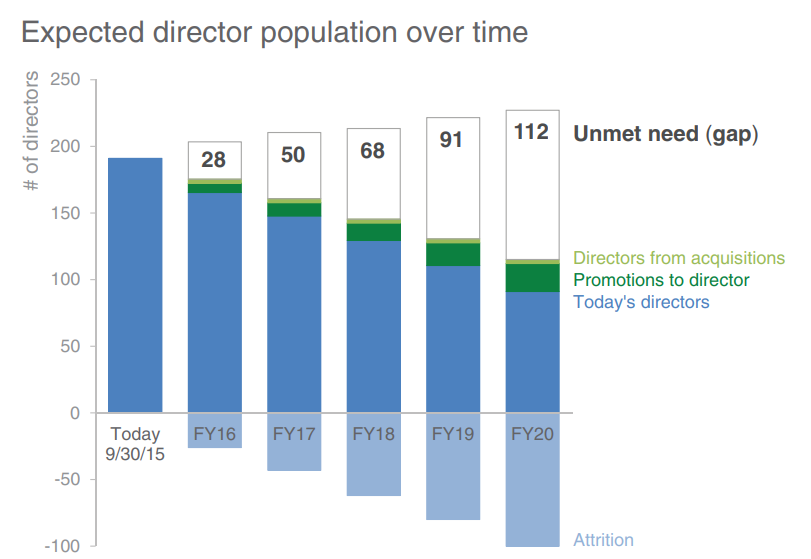

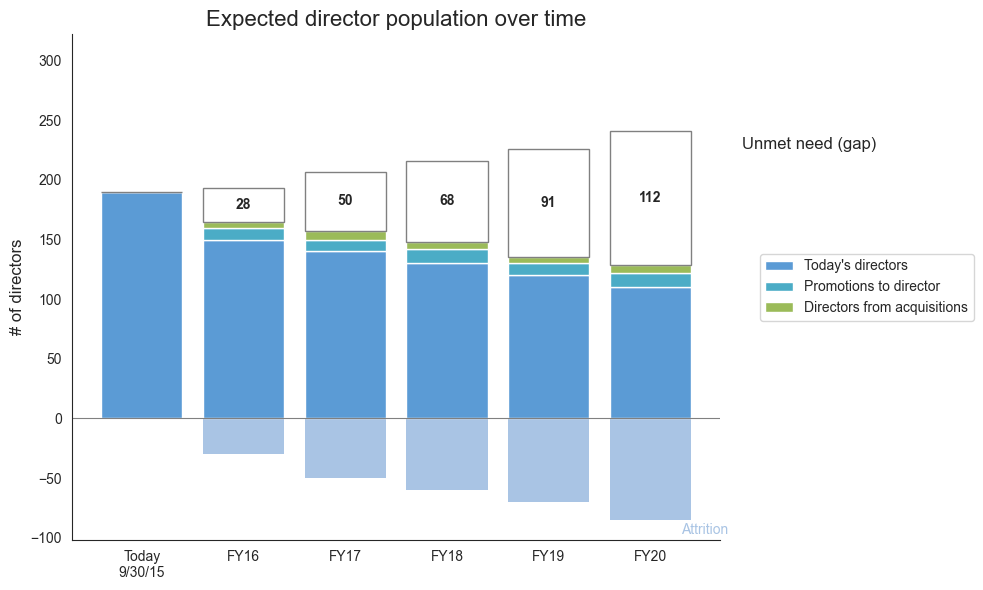

In [21]:
# Categories on the x-axis
years = ['Today\n9/30/15', 'FY16', 'FY17', 'FY18', 'FY19', 'FY20']

# Data for each segment
# Attrition is negative because it reduces the number of directors
attrition = [0, -30, -50, -60, -70, -85]
current_directors = [190, 150, 140, 130, 120, 110]
promotions = [0, 10, 10, 12, 10, 12]
acquisitions = [0, 5, 7, 6, 5, 7]
# Gap values represent the unmet need (white area on top of each bar)
gap = [0, 28, 50, 68, 91, 112]

# Define colors similar to the original chart
current_color = '#5B9BD5'   # blue for current directors
promotion_color = '#4BACC6' # teal blue for promotions
acquisition_color = '#9BBB59' # green for acquisitions
gap_color = '#FFFFFF'       # white for unmet need
attrition_color = '#A9C4E4' # light blue for attrition

# Set seaborn style for a clean look
sns.set_style("white")
plt.figure(figsize=(10, 6))

# Plot the negative attrition bars first so they appear underneath the positive segments
plt.bar(years, attrition, color=attrition_color, edgecolor='none')

# Plot the positive segments on top of the baseline
plt.bar(years, current_directors, bottom=0, color=current_color, label="Today's directors")
plt.bar(years, promotions, bottom=current_directors, color=promotion_color, label='Promotions to director')
plt.bar(years, acquisitions, bottom=np.array(current_directors) + np.array(promotions),
        color=acquisition_color, label='Directors from acquisitions')
# The gap is plotted last and given a grey edge to resemble the original chart
plt.bar(years, gap, bottom=np.array(current_directors) + np.array(promotions) + np.array(acquisitions),
        color=gap_color, edgecolor='grey')

# Add labels in the center of each gap segment
for i, g in enumerate(gap):
    if g > 0:
        y_position = current_directors[i] + promotions[i] + acquisitions[i] + g / 2
        plt.text(i, y_position, str(g), ha='center', va='center', fontweight='bold', fontsize=10)

# Annotation for unmet need
plt.text(len(years) - 0.1,
         max(np.array(current_directors) + np.array(promotions) + np.array(acquisitions) + np.array(gap)) * 0.98,
         'Unmet need (gap)', ha='left', va='top', fontsize=12)

# Annotation for attrition at the bottom
plt.text(len(years) - 0.7, min(attrition) * 1.1, 'Attrition',
         color=attrition_color, fontsize=10, ha='left', va='center')

# Titles and axis labels
plt.title('Expected director population over time', fontsize=16)
plt.ylabel('# of directors', fontsize=12)

# Draw a horizontal line at y = 0 to represent the baseline
plt.axhline(0, color='gray', linewidth=0.8)

# Remove the top and right axes for a cleaner look
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Create the legend for the colored segments (excluding gap and attrition)
handles, labels = ax.get_legend_handles_labels()
unique_labels = []
unique_handles = []
for h, l in zip(handles, labels):
    if l not in unique_labels:
        unique_labels.append(l)
        unique_handles.append(h)

plt.legend(unique_handles, unique_labels, loc='center left', bbox_to_anchor=(1.05, 0.5))

# Set the y-axis limits for better spacing
plt.ylim(min(attrition) * 1.2, max(current_directors) + max(gap) + 20)

# Ensure everything fits nicely
plt.tight_layout()

# Save the figure (optional)
plt.savefig('answer.png', dpi=200, bbox_inches='tight')
plt.show()